In [13]:
import pandas as pd

%matplotlib inline

In [2]:
triplets = pd.read_csv('../data/raw/wikidata_20190805.qpq_item_statements.csv')

In [3]:
triplets.columns

Index(['source_item_id', 'edge_property_id', 'target_item_id', 'el_rank'], dtype='object')

In [25]:
entities = pd.read_csv('../data/raw/wikidata_20190805.item.csv')

In [26]:
entities.columns

Index(['id', 'en_label', 'en_description', 'enwiki_title'], dtype='object')

In [11]:
out_degree = triplets.groupby(['source_item_id'])[['source_item_id']].count()
out_degree = out_degree.rename(columns={"source_item_id": "out_degree"})
out_degree = out_degree.reset_index()
out_degree = out_degree.sort_values('out_degree', ascending = False)

In [41]:
out_degree['out_degree'].describe()

count    5.641113e+07
mean     6.793780e+00
std      1.339614e+01
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      8.319000e+03
Name: out_degree, dtype: float64

In [21]:
top_out_degree = out_degree.iloc[:10]

In [28]:
top_out_degree = top_out_degree.merge(entities, left_on = ['source_item_id'], right_on = ['id'])

In [32]:
top_out_degree['en_label_short'] = top_out_degree['en_label'].str[:20] 

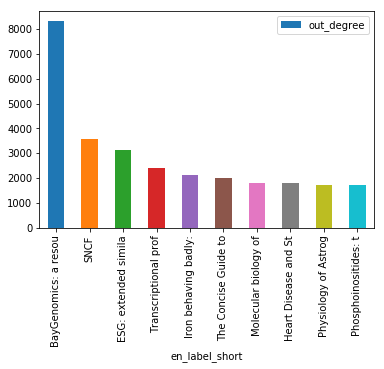

In [33]:
top_out_degree.plot.bar(x = 'en_label_short', y = 'out_degree')

In [19]:
in_degree = triplets.groupby(['target_item_id'])[['target_item_id']].count()
in_degree = in_degree.rename(columns={"target_item_id": "in_degree"})
in_degree = in_degree.reset_index()
in_degree = in_degree.sort_values('in_degree', ascending = False)

In [23]:
top_in_degree = in_degree.iloc[:10]

In [34]:
top_in_degree = top_in_degree.merge(entities, left_on = ['target_item_id'], right_on = ['id'])

In [35]:
top_in_degree

,target_item_id,in_degree,id,en_label,en_description,enwiki_title
0,13442814,21910388,13442814,scholarly article,"article in an academic publication, usually pe...",NaN
1,5,5837659,5,human,"common name of Homo sapiens, unique extant spe...",Human
2,1860,4600258,1860,English,West Germanic language originating in England ...,English language
3,4167836,4465143,4167836,Wikimedia category,use with 'instance of' (P31) for Wikimedia cat...,Wikipedia:Categorization
4,6581097,3913958,6581097,male,human who is male (use with P21),NaN
5,16521,2596501,16521,taxon,"group of one or more organism(s), which a taxo...",Taxon
6,7432,2198219,7432,species,one of the basic units of biological classific...,Species
7,30,1968964,30,United States of America,federal republic in North America,United States
8,8054,1801629,8054,protein,biological molecule consisting of chains of am...,Protein
9,7187,1609904,7187,gene,basic physical and functional unit of heredity,Gene


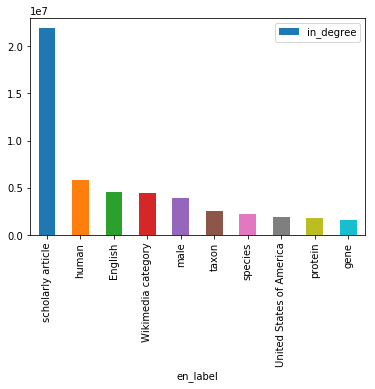

In [36]:
top_in_degree.plot.bar(x = 'en_label', y = 'in_degree')

In [42]:
in_degree['in_degree'].describe()

count    2.189076e+07
mean     1.750715e+01
std      5.276517e+03
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      9.000000e+00
max      2.191039e+07
Name: in_degree, dtype: float64